# Intro

** **

# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)
    
    1.1 [Initial Exploration](#1.1-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Incoherencies](#2.1-Incoherencies)

    2.2 [Unique Feature-Pair Analysis ](#2.2-Unique-Feature-Pair-Analysis)

    2.3 [Duplicates](#2.3-Duplicates)
    
    2.4 [Missing Values](#2.4-Missing-Values)
    
    
    --------
    
    2.4 [Outliers](#2.4-Outliers)
    
    2.5 [Feature Engineering](#2.5-Feature-Engineering)
    
    2.6 [Visualisations](#2.6-Visualisations) <br><br>
    
3. [Export](#3.-Export)


In [89]:
## notebook 1 - preprocessing + EDA
## notebook 2 - modelos



# 1. Importing Libraries & Data

In [90]:
# %pip install seaborn

In [91]:
import pandas as pd


# profile report
from ydata_profiling import ProfileReport

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# external functions file
import functions as f


In [92]:
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')

pd.set_option('display.max_columns', None)
df.head(3)

/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/ipykernel_50119/3163598516.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


## 1.1 Initial Exploration

In [93]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

In [94]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [96]:
df.shape

(593471, 32)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

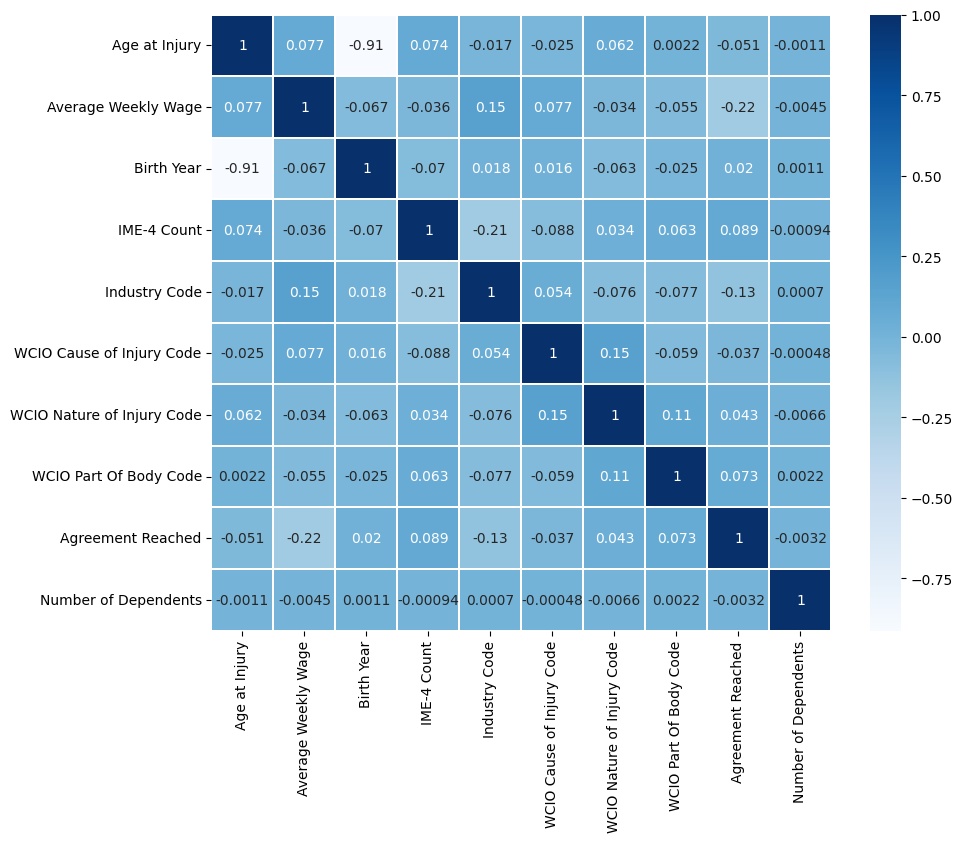

In [98]:
# drop column always missing
temp = df.drop('OIICS Nature of Injury Description', axis = 1)

# drop na
temp2 = temp.dropna()

# select numbers
corr_data = temp2.select_dtypes(include=['number'])

correlation_matrix = corr_data.corr(method='spearman') # pearson by default

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [99]:
for column in df.columns:
    
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(df[column].nunique(), '\n')

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
3 

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
2 

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
8 

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
8 

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
2 

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
8 

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
4 

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK' 'III']
5 

Unique values in 'OIICS Nature of Injury Description': [nan]
0 

Unique values in 'Agreement Reached': [ 0.  1. nan]
2 

Unique values in 'WCB Decision': ['

## 2.1 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [100]:
df[df['Age at Injury'] > 100]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5415899,2020-01-24,102.0,N,2020-01-30,N,0.0,1917.0,2020-01-30,NaN,NORTH SYRACUSE CSD,3A. SELF PUBLIC,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,61.0,EDUCATIONAL SERVICES,I,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13031,0.0,Not Work Related,2.0
5424769,2018-08-26,117.0,N,2020-02-10,N,0.0,1901.0,2020-02-10,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11218,0.0,Not Work Related,5.0
5432944,2020-02-17,113.0,N,2020-02-19,Y,692.0,1907.0,2020-02-19,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5. PPD SCH LOSS,NIAGARA,N,BUFFALO,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S),NaN,0.0,Not Work Related,5.0
5453673,2020-03-05,104.0,N,2020-03-16,Y,0.0,1916.0,2020-03-16,NaN,ONEIDA COUNTY SELF INS PLAN,3A. SELF PUBLIC,2. NON-COMP,HERKIMER,N,SYRACUSE,NaN,M,NaN,92.0,PUBLIC ADMINISTRATION,II,NaN,56.0,LIFTING,10.0,CONTUSION,52.0,UPPER LEG,13502,0.0,Not Work Related,3.0
5459129,2018-03-22,117.0,N,2020-03-27,N,0.0,1901.0,2020-03-27,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,33.0,MANUFACTURING,IV,NaN,82.0,"ABSORPTION, INGESTION OR INHALATION, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11703,0.0,Not Work Related,2.0
5546365,2016-11-01,115.0,N,2020-08-28,N,0.0,0.0,2020-08-28,NaN,WESCO INSURANCE CO,1A. PRIVATE,1. CANCELLED,ERIE,N,BUFFALO,2020-12-03,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,15.0,BROKEN GLASS,40.0,LACERATION,34.0,WRIST,14140,0.0,Not Work Related,5.0
5559268,2020-09-11,110.0,N,2020-09-15,N,0.0,1910.0,2020-09-15,NaN,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,ORANGE,N,ALBANY,NaN,F,NaN,45.0,RETAIL TRADE,III,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,53.0,KNEE,10940,0.0,Not Work Related,1.0
5706270,2021-04-21,110.0,N,2021-04-23,N,0.0,1911.0,2021-04-23,NaN,WESCO INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,40.0,LACERATION,18.0,SOFT TISSUE,11946,0.0,Not Work Related,5.0
5804529,2021-07-02,101.0,N,2021-09-03,N,0.0,1920.0,2021-09-03,NaN,CAROLINA CASUALTY INS CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,35.0,HAND,11763,0.0,Not Work Related,0.0


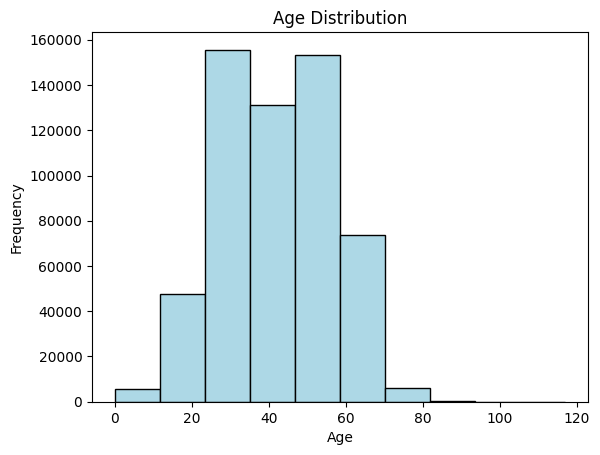

In [101]:
f.plot_histogram(df['Age at Injury'], 'Age', 'Frequency',
                'Age Distribution')

In [102]:
# age 0 at injury while being born a long time before the accident
df[(df['Age at Injury'] == 0) & (df['Birth Year'] != df['Accident Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
5394093,2019-12-28,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5.0
5394068,NaN,0.0,N,2020-01-02,Y,0.0,1959.0,NaN,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0
5393794,NaN,0.0,N,2020-01-02,Y,0.0,1984.0,NaN,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0
5393876,2019-12-20,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,CARMEL CENTRAL SCHOOL DISTRICT,3A. SELF PUBLIC,2. NON-COMP,PUTNAM,N,ALBANY,NaN,F,NaN,NaN,NaN,III,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,35.0,HAND,10512,0.0,Not Work Related,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164179,NaN,0.0,N,2022-12-30,Y,0.0,0.0,2023-01-10,2022-12-28,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,-9.0,MULTIPLE,22473,0.0,Not Work Related,3.0
6164933,NaN,0.0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6.0
6164931,NaN,0.0,N,2022-12-30,Y,0.0,1957.0,NaN,2022-12-27,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1. CANCELLED,KINGS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0.0


**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [103]:
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


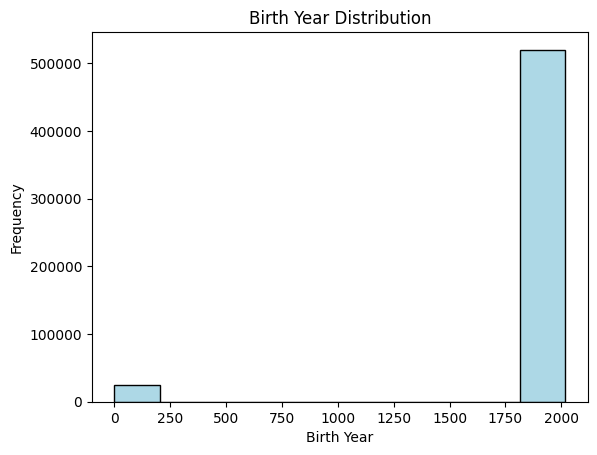

In [104]:
f.plot_histogram(df['Birth Year'], 'Birth Year', 'Frequency',
                'Birth Year Distribution')

**IME-4 Count**

Very High 

In [105]:
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


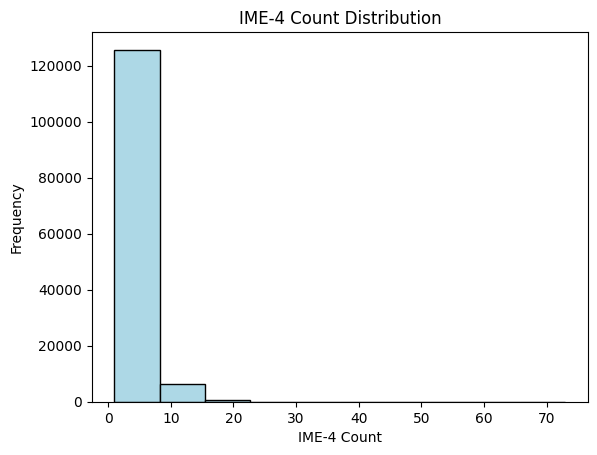

In [106]:
f.plot_histogram(df['IME-4 Count'], 'IME-4 Count', 'Frequency',
                'IME-4 Count Distribution')

**OIICS Nature of Injury Description**

always missing

In [107]:
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 593471
Number of Rows in the Dataset: 593471


**Agreement Reached**

w/ a lot of zeros

In [108]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

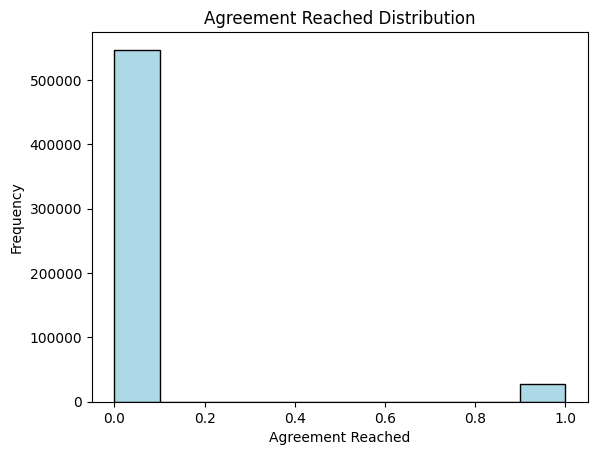

In [109]:
f.plot_histogram(df['Agreement Reached'], 'Agreement Reached', 'Frequency',
                'Agreement Reached Distribution')

**WCB Decision**

always the same

In [110]:
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Look at df**

before next step

In [111]:
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


## 2.3 Duplicates

<a href="#top">Top &#129033;</a>

In [112]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
len(df[df.duplicated()])

18350

In [114]:
len(df[df.duplicated()]) / len(df) * 100

3.091979220551636

In [115]:
df = df.drop_duplicates()

verify the success

In [116]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 2.3 Datatype Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575121 entries, 5393875 to 6165075
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574025 non-null  float64
 2   Alternative Dispute Resolution      574025 non-null  object 
 3   Assembly Date                       575121 non-null  object 
 4   Attorney/Representative             574025 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544947 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187244 non-null  object 
 9   Carrier Name                        574025 non-null  object 
 10  Carrier Type                        574025 non-null  object 
 11  Claim Injury Type       

In [118]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], 
                                     errors='coerce')

df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], 
                                     errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], 
                                errors='coerce')

df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], 
                                errors='coerce')

df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], 
                                          errors='coerce')

In [119]:
df.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


## TRAIN TEST SPLIT BEFORE TREATING MISSING VALUES

In some cases (e.g., when applying cross-validation or using sophisticated imputation methods), it might be better to fit the imputation on the training set only and then apply the same transformation to the test set. But even then, the strategy is first determined on the training data to avoid leakage.

## 2.4 Missing Values

<a href="#top">Top &#129033;</a>

look for missing values

In [120]:
df.isna().sum()


Accident Date                           4784
Age at Injury                           1096
Alternative Dispute Resolution          1096
Assembly Date                              0
Attorney/Representative                 1096
Average Weekly Wage                    29747
Birth Year                             30174
C-2 Date                               15655
C-3 Date                              387877
Carrier Name                            1096
Carrier Type                            1096
Claim Injury Type                       1096
County of Injury                        1096
COVID-19 Indicator                      1096
District Name                           1096
First Hearing Date                    424324
Gender                                  1096
IME-4 Count                           442318
Industry Code                          11053
Industry Code Description              11053
Medical Fee Region                      1096
OIICS Nature of Injury Description    575121
WCIO Cause

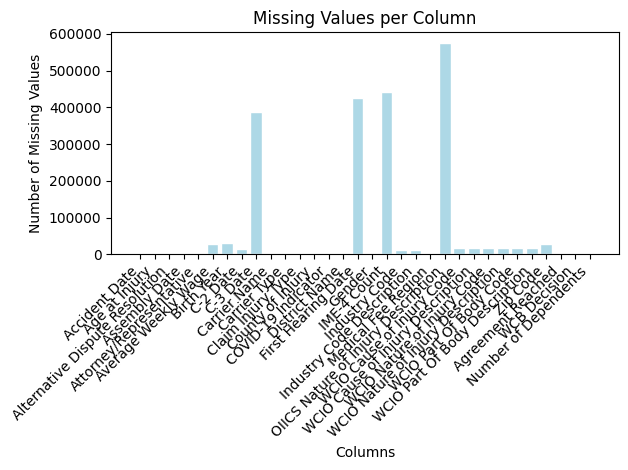

In [121]:
missing_values_per_column = df.isna().sum()


f.plot_missing_values_bar(
    data=missing_values_per_column,
    xlabel='Columns',
    ylabel='Number of Missing Values',
    title='Missing Values per Column'
)


same but in percentage

In [122]:
df.isna().sum() / len(df) * 100

Accident Date                           0.831825
Age at Injury                           0.190569
Alternative Dispute Resolution          0.190569
Assembly Date                           0.000000
Attorney/Representative                 0.190569
Average Weekly Wage                     5.172303
Birth Year                              5.246548
C-2 Date                                2.722036
C-3 Date                               67.442677
Carrier Name                            0.190569
Carrier Type                            0.190569
Claim Injury Type                       0.190569
County of Injury                        0.190569
COVID-19 Indicator                      0.190569
District Name                           0.190569
First Hearing Date                     73.779952
Gender                                  0.190569
IME-4 Count                            76.908685
Industry Code                           1.921856
Industry Code Description               1.921856
Medical Fee Region  

**looking for lines with more than 25 missing value** --> only have date

In [123]:
df[df.isna().sum(axis=1) >= 25]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaT,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaT,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaT,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaT,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaT,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaT,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaT,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


drop them

In [124]:
df = df[df.isna().sum(axis=1) < 25]

Remaining cases

In [125]:
df.isna().sum() / len(df) * 100

Accident Date                           0.642481
Age at Injury                           0.000000
Alternative Dispute Resolution          0.000000
Assembly Date                           0.000000
Attorney/Representative                 0.000000
Average Weekly Wage                     4.991246
Birth Year                              5.065633
C-2 Date                                2.536301
C-3 Date                               67.380515
Carrier Name                            0.000000
Carrier Type                            0.000000
Claim Injury Type                       0.000000
County of Injury                        0.000000
COVID-19 Indicator                      0.000000
District Name                           0.000000
First Hearing Date                     73.729890
Gender                                  0.000000
IME-4 Count                            76.864596
Industry Code                           1.734593
Industry Code Description               1.734593
Medical Fee Region  

look case by case --> focus on high % of missing first

**C-3 Date**

In [126]:
df[df['C-3 Date'].isna()]

# var description: Date Form C-3 (Employee Claim Form) was received
## interpretation --> if missing, was not received --> fill w/ 0 ou deixar estar como está (?) --> pode dar problema nas visualisations

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaT,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaT,M,NaN,44.0,RETAIL TRADE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
5393848,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaT,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaT,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,2022-12-14,35.0,N,2022-12-30,N,0.00,1987.0,2022-12-30,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,BRONX,N,NYC,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0
6165285,2022-12-15,33.0,N,2022-12-31,N,0.00,1989.0,2022-12-31,NaT,WESCO INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0
6165506,2022-12-13,61.0,N,2022-12-31,N,991.08,1961.0,2022-12-31,NaT,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,4. TEMPORARY,ERIE,N,BUFFALO,NaT,F,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,3.0


In [127]:
#df['C-3 Date'] = df['C-3 Date'].fillna(0)

In [128]:
## ALTERNATIVA

# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
df['C-3 Date Binary'] = df['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [129]:
df[df['First Hearing Date'].isna()]

# var meaning --> Date the first hearing was held on a claim at a WCB hearinglocation. A blank date means the claim has not yet had ahearing held
## sol --> fill w/ 0s ou deixar estar como está (?) --> pode dar problema nas visualisations

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0,0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0,0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0,0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaT,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaT,M,NaN,44.0,RETAIL TRADE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0,0
5393848,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaT,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaT,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,2022-12-14,35.0,N,2022-12-30,N,0.00,1987.0,2022-12-30,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,BRONX,N,NYC,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0,0
6165285,2022-12-15,33.0,N,2022-12-31,N,0.00,1989.0,2022-12-31,NaT,WESCO INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0,0
6165506,2022-12-13,61.0,N,2022-12-31,N,991.08,1961.0,2022-12-31,NaT,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,4. TEMPORARY,ERIE,N,BUFFALO,NaT,F,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,3.0,0


In [130]:
#df['First Hearing Date'] = df['First Hearing Date'].fillna(0)

In [131]:
## ALTERNATIVE

# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year

df['First Hearing Year'] = df['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [132]:
df[df['IME-4 Count'].isna()]

# var description -->Number of IME-4 forms received per claim. The IME-4 form isthe “Independent Examiner's Report of Independent MedicalExamination” form
## if missing, no forms received --> fill w/ zero

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0,0,0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.8,1979.0,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0,0,0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0,0,0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.0,1952.0,2019-12-31,NaT,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaT,M,NaN,44.0,RETAIL TRADE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0,0,0
5393848,2019-12-28,48.0,N,2020-01-01,N,0.0,1971.0,2019-12-31,NaT,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaT,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165331,2022-12-28,29.0,N,2022-12-30,N,0.0,NaN,2022-12-30,NaT,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaT,M,NaN,44.0,RETAIL TRADE,IV,NaN,81.0,"STRUCK OR INJURED, NOC",13.0,CRUSHING,35.0,HAND,10453,0.0,Not Work Related,1.0,0,0
6165265,2022-12-14,35.0,N,2022-12-30,N,0.0,1987.0,2022-12-30,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,BRONX,N,NYC,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0,0,0
6165285,2022-12-15,33.0,N,2022-12-31,N,0.0,1989.0,2022-12-31,NaT,WESCO INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0,0,0


In [133]:
df['IME-4 Count'] = df['IME-4 Count'].fillna(0)

drop transformed variables and var which is always missing

In [134]:
df = df.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

verify success of the task

In [135]:
df.isna().sum() / len(df) * 100


# Accident Date - Injury date of the claim
# Average Weekly Wage - The wage used to calculate workers’ compensation,disability, or an Paid Leave wage replacement benefits
# Birth Year - The reported year of birth of the injured worker
# C-2 Date - Date of receipt of the Employer's Report of Work-RelatedInjury/Illness or equivalent

# Industry Code
# WCIO Cause of Injury Code 
# WCIO Nature of Injury Code
# WCIO Part Of Body Code 
# Zip Code

Accident Date                        0.642481
Age at Injury                        0.000000
Alternative Dispute Resolution       0.000000
Assembly Date                        0.000000
Attorney/Representative              0.000000
Average Weekly Wage                  4.991246
Birth Year                           5.065633
C-2 Date                             2.536301
Carrier Name                         0.000000
Carrier Type                         0.000000
Claim Injury Type                    0.000000
County of Injury                     0.000000
COVID-19 Indicator                   0.000000
District Name                        0.000000
Gender                               0.000000
IME-4 Count                          0.000000
Industry Code                        1.734593
Industry Code Description            1.734593
Medical Fee Region                   0.000000
WCIO Cause of Injury Code            2.724446
WCIO Cause of Injury Description     2.724446
WCIO Nature of Injury Code        

look at the rest that are missing

**Accident Date**

In [136]:
# always has age at injury 0
df[df['Accident Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394068,NaT,0.0,N,2020-01-02,Y,0.0,1959.0,NaT,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,M,0.0,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0,1,0
5393794,NaT,0.0,N,2020-01-02,Y,0.0,1984.0,NaT,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,F,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0,1,0
5394023,NaT,0.0,N,2020-01-02,Y,0.0,0.0,2021-03-26,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,2. NON-COMP,NEW YORK,N,NYC,M,0.0,92.0,PUBLIC ADMINISTRATION,UK,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),34997,0.0,Not Work Related,2.0,1,2020
5393999,NaT,0.0,N,2020-01-02,Y,0.0,1967.0,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,1. CANCELLED,ALBANY,N,ALBANY,M,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,12209,0.0,Not Work Related,6.0,1,0
5394824,NaT,0.0,N,2020-01-03,Y,0.0,1971.0,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,1. CANCELLED,KINGS,N,NYC,M,0.0,32.0,MANUFACTURING,IV,NaN,NaN,NaN,NaN,NaN,NaN,11231,0.0,Not Work Related,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163633,NaT,0.0,N,2022-12-29,Y,0.0,1967.0,NaT,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11422,0.0,Not Work Related,1.0,1,0
6164216,NaT,0.0,N,2022-12-30,Y,0.0,1961.0,2023-01-10,COUNTY OF NASSAU,3A. SELF PUBLIC,2. NON-COMP,NASSAU,N,NYC,M,0.0,92.0,PUBLIC ADMINISTRATION,IV,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11756,0.0,Not Work Related,0.0,1,2023
6164179,NaT,0.0,N,2022-12-30,Y,0.0,0.0,2023-01-10,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,UK,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,-9.0,MULTIPLE,22473,0.0,Not Work Related,3.0,1,0


In [137]:
# 90% of the times Accident Date and Assembly Date happen in the same year 
len(df[df['Accident Date'].dt.year == df['Assembly Date'].dt.year]) / len(df)

0.9030216453987195

In [138]:
# 7.50% of the times Accident Date happens the year after Assembly Date 
len(df[df['Accident Date'].dt.year == df['Assembly Date'].dt.year - 1]) / len(df)

0.07458037541918906

In [139]:
#this means 97% of the times Assembly date occured within a year of the accident
# knowing this, we will fill the missing values in Accident Date with the same year of assmebly date

In [140]:
import numpy as np

def fill_missing_dates(row):
    if pd.isna(row['Accident Date']):
        # Choose year from Assembly Date 90% of the time, year before 10% of the time
        if np.random.rand() < 0.9:
            return row['Assembly Date'].replace(year=row['Assembly Date'].year)
        else:
            return row['Assembly Date'].replace(year=row['Assembly Date'].year - 1)
    return row['Accident Date']

In [141]:
df['Accident Date'] = df.apply(fill_missing_dates, axis=1)

**Average Weekly Wage**

In [142]:
df[df['Average Weekly Wage'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0,0,0
5393790,2019-12-30,60.0,N,2020-01-01,N,NaN,1959.0,2020-01-01,XL INSURANCE AMERICA,1A. PRIVATE,2. NON-COMP,CAYUGA,N,SYRACUSE,M,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,I,29.0,ON SAME LEVEL,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,13092,0.0,Not Work Related,1.0,0,0
5394159,2019-12-29,38.0,N,2020-01-01,N,NaN,1981.0,2020-01-01,SOMPO AMERICA FIRE & MARINE,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,M,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,37.0,THUMB,11510,0.0,Not Work Related,0.0,0,0
5394110,2019-12-23,47.0,N,2020-01-01,N,NaN,1972.0,2020-01-01,FIREMANS FUND INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,F,0.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,29.0,ON SAME LEVEL,90.0,MULTIPLE PHYSICAL INJURIES ONLY,34.0,WRIST,11710,0.0,Not Work Related,2.0,0,0
5393893,2019-12-12,48.0,N,2020-01-01,Y,NaN,1971.0,2019-12-31,LM INSURANCE CORP,1A. PRIVATE,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,M,5.0,42.0,WHOLESALE TRADE,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,53.0,KNEE,11769,0.0,Not Work Related,3.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165288,2022-12-22,39.0,N,2022-12-30,N,NaN,1983.0,2022-12-30,PENNSYLVANIA MANUFACTURERS',1A. PRIVATE,4. TEMPORARY,ONONDAGA,N,SYRACUSE,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,32.0,ON ICE OR SNOW,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",53.0,KNEE,13057,0.0,Not Work Related,2.0,0,0
6164295,2022-09-06,45.0,N,2022-12-30,Y,NaN,1976.0,2023-01-13,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,3. MED ONLY,BRONX,N,NYC,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,-9.0,MULTIPLE,10461,0.0,Not Work Related,0.0,1,0
6165169,2022-12-19,42.0,N,2022-12-30,N,NaN,1980.0,2022-12-30,PUBLIC EMPLOYERS RISK MGMT.,3A. SELF PUBLIC,2. NON-COMP,NASSAU,N,NYC,M,0.0,92.0,PUBLIC ADMINISTRATION,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,37.0,THUMB,11793,0.0,Not Work Related,5.0,0,0


In [143]:
# KNN imputation ?

**Birth Year**

can be computed from Age at Injury & accident date

In [144]:
df[df['Birth Year'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394084,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,LM INSURANCE CORP,1A. PRIVATE,3. MED ONLY,KINGS,N,NYC,F,0.0,44.0,RETAIL TRADE,IV,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0,0,0
5393985,2019-12-26,51.0,N,2020-01-01,N,0.00,NaN,2020-01-01,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,QUEENS,N,NYC,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,1.0,CHEMICALS,4.0,BURN,37.0,THUMB,11106,0.0,Not Work Related,3.0,0,0
5393791,2019-12-23,38.0,N,2020-01-01,N,0.00,NaN,2020-01-01,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,F,0.0,44.0,RETAIL TRADE,II,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),13203,0.0,Not Work Related,2.0,1,0
5393928,2019-12-27,32.0,N,2020-01-01,Y,519.65,NaN,2019-12-31,LM INSURANCE CORP,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,M,4.0,44.0,RETAIL TRADE,UK,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,07093,1.0,Not Work Related,6.0,1,2020
5394185,2019-12-18,64.0,N,2020-01-01,Y,474.00,NaN,2019-12-31,LIBERTY INSURANCE CORP.,1A. PRIVATE,5. PPD SCH LOSS,KINGS,N,NYC,F,2.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,50.0,"MOTOR VEHICLE, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11210,0.0,Not Work Related,6.0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165171,2022-12-28,36.0,N,2022-12-30,N,0.00,NaN,2022-12-30,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,3. MED ONLY,KINGS,N,NYC,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,33.0,ON STAIRS,10.0,CONTUSION,53.0,KNEE,11238,0.0,Not Work Related,4.0,0,0
6165252,2022-12-17,60.0,N,2022-12-30,N,1854.43,NaN,2022-12-30,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,ALBANY,N,ALBANY,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,56.0,LIFTING,52.0,STRAIN OR TEAR,-9.0,MULTIPLE,12047,0.0,Not Work Related,6.0,0,0
6165481,2022-11-15,40.0,N,2022-12-30,N,0.00,NaN,2022-12-30,NORTH RIVER INSURANCE CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,UK,30.0,"SLIP, OR TRIP, DID NOT FALL",49.0,SPRAIN OR TEAR,56.0,FOOT,18840,0.0,Not Work Related,6.0,0,0


In [145]:
df.loc[df['Birth Year'].isna(), 
       'Birth Year'] = df['Accident Date'].dt.year - df['Age at Injury']


**C-2 Date**

In [146]:
df[df['C-2 Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaT,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,M,0.0,44.0,RETAIL TRADE,IV,NaN,NaN,NaN,NaN,NaN,NaN,11411,0.0,Not Work Related,4.0,1,0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaT,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,M,0.0,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,07621,0.0,Not Work Related,5.0,1,2020
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,F,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,12306,0.0,Not Work Related,5.0,1,0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,M,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0,0,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaT,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,M,0.0,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,12150,0.0,Not Work Related,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164723,2022-11-30,30.0,N,2022-12-30,N,0.0,1992.0,NaT,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,ROCKLAND,N,NYC,M,0.0,NaN,NaN,III,NaN,NaN,NaN,NaN,NaN,NaN,10954,0.0,Not Work Related,5.0,1,0
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaT,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11590,0.0,Not Work Related,5.0,1,0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaT,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,F,0.0,NaN,NaN,III,NaN,NaN,NaN,NaN,NaN,NaN,10701,0.0,Not Work Related,3.0,1,0


**Industry Code**

In [147]:
df[(df['Industry Code'].isna()) & (df['Industry Code Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaT,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,M,0.0,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,07621,0.0,Not Work Related,5.0,1,2020
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaT,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,F,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,12306,0.0,Not Work Related,5.0,1,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaT,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,M,0.0,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,12150,0.0,Not Work Related,3.0,1,0
5394102,2019-12-20,33.0,N,2020-01-02,N,0.0,0.0,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,GREENE,N,ALBANY,M,0.0,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,12042,0.0,Not Work Related,3.0,1,0
5393964,2001-09-12,49.0,N,2020-01-02,Y,0.0,1952.0,NaT,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,NEW YORK,N,STATEWIDE,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11756,0.0,Not Work Related,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaT,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11590,0.0,Not Work Related,5.0,1,0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaT,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,F,0.0,NaN,NaN,III,NaN,NaN,NaN,NaN,NaN,NaN,10701,0.0,Not Work Related,3.0,1,0
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,M,0.0,NaN,NaN,UK,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0,1,2023


In [148]:
df['Industry Code'].unique()

array([44., 23., 56., 62., 72., 61., 51., 31., 48., 45., 42., 53., 52.,
       49., 81., 92., 33., 54., 32., 71., nan, 22., 11., 21., 55.])

In [88]:
# fill with new code for unknown - 0

df['Industry Code'] = df['Industry Code'].fillna(0)
df['Industry Code Description'] = df['Industry Code Description'].fillna('Unknown')

**WCIO Cause of Injury Code**

In [63]:
df[(df['WCIO Cause of Injury Code'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaT,2019-12-26,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,NaT,M,0.0,44.0,IV,NaN,NaN,NaN,11411,0.0,4.0,1,0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaT,2019-12-27,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,2020-09-15,M,0.0,0.0,UK,NaN,NaN,NaN,07621,0.0,5.0,1,2020
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaT,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,NaT,F,0.0,0.0,II,NaN,NaN,NaN,12306,0.0,5.0,1,0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaT,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaT,M,0.0,62.0,IV,NaN,NaN,NaN,11801,0.0,1.0,0,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaT,2019-12-30,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,NaT,M,0.0,0.0,I,NaN,NaN,NaN,12150,0.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaT,2022-12-21,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,NaT,M,0.0,0.0,IV,NaN,NaN,NaN,11590,0.0,5.0,1,0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaT,2022-12-28,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,NaT,F,0.0,0.0,III,NaN,NaN,NaN,10701,0.0,3.0,1,0
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,0.0,0.0,UK,NaN,NaN,-9.0,44405,0.0,6.0,1,2023


In [64]:
# fill with new code for unknown - 0

df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(0)

**WCIO Nature of Injury Code**

In [65]:
df[df['WCIO Nature of Injury Code'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaT,2019-12-26,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,NaT,M,0.0,44.0,IV,0.0,NaN,NaN,11411,0.0,4.0,1,0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaT,2019-12-27,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,2020-09-15,M,0.0,0.0,UK,0.0,NaN,NaN,07621,0.0,5.0,1,2020
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaT,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,NaT,F,0.0,0.0,II,0.0,NaN,NaN,12306,0.0,5.0,1,0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaT,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaT,M,0.0,62.0,IV,0.0,NaN,NaN,11801,0.0,1.0,0,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaT,2019-12-30,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,NaT,M,0.0,0.0,I,0.0,NaN,NaN,12150,0.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaT,2022-12-21,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,NaT,M,0.0,0.0,IV,0.0,NaN,NaN,11590,0.0,5.0,1,0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaT,2022-12-28,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,NaT,F,0.0,0.0,III,0.0,NaN,NaN,10701,0.0,3.0,1,0
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,0.0,0.0,UK,0.0,NaN,-9.0,44405,0.0,6.0,1,2023


In [66]:
# fill with new code for unknown - 0

df['WCIO Nature of Injury Code'] = df['WCIO Nature of Injury Code'].fillna(0)

**WCIO Part Of Body Code**

In [67]:
df[df['WCIO Part Of Body Code'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaT,2019-12-26,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,NaT,M,0.0,44.0,IV,0.0,0.0,NaN,11411,0.0,4.0,1,0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaT,2019-12-27,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,2020-09-15,M,0.0,0.0,UK,0.0,0.0,NaN,07621,0.0,5.0,1,2020
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaT,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,NaT,F,0.0,0.0,II,0.0,0.0,NaN,12306,0.0,5.0,1,0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaT,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaT,M,0.0,62.0,IV,0.0,0.0,NaN,11801,0.0,1.0,0,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaT,2019-12-30,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,NaT,M,0.0,0.0,I,0.0,0.0,NaN,12150,0.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164723,2022-11-30,30.0,N,2022-12-30,N,0.0,1992.0,NaT,2022-12-23,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,ROCKLAND,N,NYC,NaT,M,0.0,0.0,III,0.0,0.0,NaN,10954,0.0,5.0,1,0
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaT,2022-12-21,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,NaT,M,0.0,0.0,IV,0.0,0.0,NaN,11590,0.0,5.0,1,0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaT,2022-12-28,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,NaT,F,0.0,0.0,III,0.0,0.0,NaN,10701,0.0,3.0,1,0


In [68]:
# fill with new code for unknown - 0

df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(0)

**Zip Code**

In [69]:
df[df['Zip Code'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393066,2019-09-17,64.0,N,2020-01-01,N,1345.97,1954.0,2020-01-01,NaT,HARTFORD FIRE INSURANCE CO,1A. PRIVATE,4. TEMPORARY,GENESEE,N,ROCHESTER,NaT,F,0.0,33.0,I,97.0,46.0,38.0,NaN,1.0,1.0,0,0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.00,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaT,F,0.0,51.0,UK,97.0,52.0,38.0,NaN,0.0,2.0,1,0
5394036,2019-12-23,42.0,N,2020-01-01,Y,1432.44,1977.0,2020-01-01,2019-12-27,ACE AMERICAN INSURANCE CO,1A. PRIVATE,5. PPD SCH LOSS,NEW YORK,N,NYC,2020-11-06,M,0.0,72.0,IV,29.0,52.0,90.0,NaN,0.0,5.0,1,2020
5394181,2019-12-19,49.0,N,2020-01-01,Y,225.00,1970.0,2019-12-31,2020-01-06,MICHIGAN MILLERS MUTUAL,1A. PRIVATE,3. MED ONLY,QUEENS,N,NYC,2021-05-18,M,6.0,23.0,IV,26.0,40.0,13.0,NaN,0.0,2.0,1,2021
5394157,2019-12-26,22.0,N,2020-01-01,N,0.00,1997.0,2020-01-01,NaT,EASTGUARD INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,QUEENS,N,NYC,NaT,M,0.0,44.0,IV,16.0,40.0,36.0,NaN,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165403,2022-12-21,47.0,N,2022-12-30,N,0.00,1975.0,2022-12-30,NaT,CANASERAGA CENTRAL SCHOOL,3A. SELF PUBLIC,2. NON-COMP,ALLEGANY,N,ROCHESTER,NaT,F,0.0,61.0,I,80.0,49.0,31.0,NaN,0.0,5.0,0,0
6165303,2022-12-27,58.0,N,2022-12-30,N,0.00,1964.0,2022-12-30,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaT,F,0.0,62.0,IV,29.0,40.0,17.0,NaN,0.0,4.0,0,0
6164784,2022-12-21,43.0,N,2022-12-30,N,2407.46,1979.0,2022-12-30,NaT,HARTFORD CASUALTY INSURANCE CO,1A. PRIVATE,3. MED ONLY,ERIE,N,BUFFALO,NaT,M,0.0,54.0,II,33.0,34.0,53.0,NaN,0.0,6.0,0,0


In [70]:
# fill with new code for unknown - 0

df['Zip Code'] = df['Zip Code'].fillna(99999)

verify success of operations

In [71]:
df.isna().sum()

Accident Date                       3688
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                28651
Birth Year                         29078
C-2 Date                           14559
C-3 Date                          386781
Carrier Name                           0
Carrier Type                           0
Claim Injury Type                      0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                423228
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reache

In [ ]:
# drop C3, First Hearing Date

## 2.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [26]:
injury_cause = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
97.0,REPETITIVE MOTION


In [27]:
injury_nature = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [28]:
body_code = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_df = body_code.set_index('WCIO Part Of Body Code')


body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
62.0,BUTTOCKS
38.0,SHOULDER(S)


In [29]:
industry_code = df[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_df = industry_code.set_index('Industry Code')


industry_code_df.head(2)

,Industry Code Description
Industry Code,
44.0,RETAIL TRADE
23.0,CONSTRUCTION


remove unnecessary columns from df

In [30]:
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

antes de remover esta descriptions foi confirmado se haviam missing values nos codes mas havia a sua descrição, oq n aconteceu

**Look at df**

before next step

In [31]:
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,I,27.0,10.0,62.0,13662,0.0,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,I,97.0,49.0,38.0,14569,1.0,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,II,79.0,7.0,10.0,12589,0.0,6.0


## 2.5 Outliers

<a href="#top">Top &#129033;</a>

In [ ]:
f.boxplots(df.loc[:, df.columns])

In [ ]:
for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            f.plot_histogram(df[column], 
                           xlabel=column, 
                           ylabel='Frequency', 
                           title=f'Histogram of {column}', 
                           color='lightblue')

## 2.6 Feature Engineering

<a href="#top">Top &#129033;</a>

In [ ]:
# df = df.drop('OIICS Nature of Injury Description', axis = 1)
# df = df.drop('WCB Decision', axis = 1)

**Accident Date**

transform into year (maybe month and day too)

**Age at Injury**

transform to binary

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

**Assembly Date**

transform into year (maybe month and day too)

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

**C-2 Date**

transform into year (maybe month and day too)

**Carrier Name**

too many unique values to encode, probably drop

In [78]:
df['Carrier Name'].nunique()

2046

**Carrier Type**

encode (8 unique values)

**Claim Injury Type**

encode (8 unique values)

**County of Injury**

probably too many to encode (?) --> one hot encoding

In [80]:
df['County of Injury'].nunique()

63

**COVID-19 Indicator**

binary encoding

**District Name**

encode (8 uniques)

In [79]:
df['District Name'].nunique()

8

**Gender**

encode ['M' 'F' nan 'U' 'X']

**Medical Fee Region**

encode

In [81]:
df['Medical Fee Region'].nunique()

5

In [77]:
df.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,0.0,44.0,I,27.0,10.0,62.0,13662,0.0,1.0,0,0


In [ ]:
# ### NOTES

# Attorney/Representative to binary ['N' 'Y' nan]

# Alternative Dispute Resolution - encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

# Carrier Type - encode (8 unique values)

# Claim Injury Type - encode (8 unique values)

# COVID-19 Indicator - binary ['N' nan 'Y']

# Gender - encode ['M' 'F' nan 'U' 'X']

# OIICS Nature of Injury Description - drop [nan]

# Agreement Reached - treat missing [ 0.  1. nan]

# WCB Decision - drop ['Not Work Related' nan]

# Number of Dependents - treat missing [ 1.  4.  6. nan  5.  3.  2.  0.]





TABLE WITH MEANING OF VARIABLES

# SPlit Data

In [ ]:
X = df.drop('Claim Injury Type', axis = 1)

y = df['Claim Injury Type']

# 3. Export

<a href="#top">Top &#129033;</a>

In [ ]:
#df.to_csv('./project_data/treated_data')